# Pattern Recognition

In [6]:
from ml.activations import softmax, relu
from ml.layers import FullyConnected, Conv2D, MaxPool2D, Flatten
from ml.losses import cross_entropy
from ml.neural_network import NeuralNetworkClassifier
from optimization.unconstrained.adam import Adam
from utils import load_mnist
from sklearn.metrics import classification_report
from utils import plot_model_accuracy, plot_model_loss

iter	f(x)		||g(x)||
   0	9.9169e+00	6.8299e+04
  10	2.3483e-01	2.9501e+02
  20	2.0131e-01	1.7342e+02
  30	2.0260e-01	2.7406e+02
  40	2.2694e-01	3.1310e+02
  50	1.9898e-01	1.4317e+02
  60	1.8601e-01	1.9767e+02
  70	1.7123e-01	3.2630e+02
  80	1.7646e-01	2.8955e+02
  90	1.5955e-01	3.1961e+02
 100	1.5752e-01	2.9923e+02
 110	1.6361e-01	3.8056e+02
 120	1.5891e-01	2.2562e+02
 130	1.5151e-01	4.5149e+02
 140	1.2224e-01	3.2679e+02
 150	1.4263e-01	4.2529e+02
 160	1.3206e-01	2.9151e+02
 170	1.1355e-01	2.6462e+02
 180	1.0694e-01	3.5853e+02
 190	1.3081e-01	2.7449e+02
 200	1.2732e-01	3.9505e+02
 210	1.1641e-01	2.6593e+02
 220	1.4326e-01	3.5647e+02
 230	1.0546e-01	4.0786e+02
 240	1.4183e-01	2.5224e+02
 250	1.3879e-01	4.5928e+02
 260	1.4502e-01	3.6972e+02
 270	1.6058e-01	6.0544e+02
 280	1.3257e-01	1.9261e+02
 290	1.2763e-01	2.7353e+02
 300	1.3069e-01	2.6642e+02


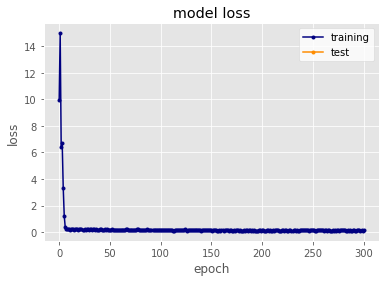

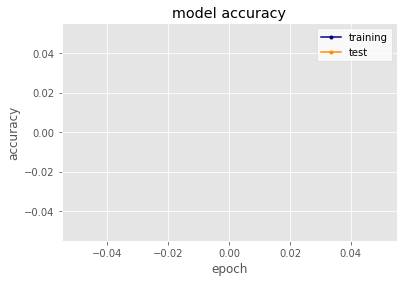

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       980
           1       0.91      0.89      0.90      1135
           2       0.83      0.63      0.71      1032
           3       0.74      0.86      0.80      1010
           4       0.70      0.65      0.67       982
           5       0.68      0.67      0.68       892
           6       0.73      0.84      0.78       958
           7       0.88      0.73      0.80      1028
           8       0.70      0.80      0.74       974
           9       0.65      0.65      0.65      1009

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [8]:
X_train, X_test, y_train, y_test = load_mnist()

cnn = NeuralNetworkClassifier(
    (Conv2D(in_channels=1, out_channels=6, kernel_size=(5, 5), strides=(1, 1),
            padding='same', channels_last=True, activation=relu),  # => [n,28,28,6]
     MaxPool2D(pool_size=(2, 2), strides=(2, 2)),  # => [n,14,14,6]
     Conv2D(in_channels=6, out_channels=16, kernel_size=(5, 5), strides=(1, 1),
            padding='same', channels_last=True, activation=relu),  # => [n,14,14,16]
     MaxPool2D(pool_size=(2, 2), strides=(2, 2)),  # => [n,7,7,16]
     Flatten(),  # => [n,7*7*16]
     FullyConnected(n_in=7 * 7 * 16, n_out=10, activation=softmax)),
    loss=cross_entropy, optimizer=Adam, learning_rate=0.01, epochs=300, 
    momentum_type='nesterov', momentum=0.6, batch_size=64, verbose=10)
cnn.fit(X_train, y_train)
plot_model_loss(cnn.loss_history)
plot_model_accuracy(cnn.accuracy_history)
print(classification_report(y_test, cnn.predict(X_test)))